In [1]:
%matplotlib inline
#
from lrgsglib import *
#
move_to_rootf(pathname='lrg_eegfc')
#
from lrg_eegfc import *
#
path_figs = Path('data') / 'figures' / 'test'
path_figs.mkdir(parents=True, exist_ok=True)

Current working directory: /home/opisthofulax/Documents/research+/brain_network/lrg_eegfc


### Data Reader

In [2]:
data_dict, int_label_pos_map = load_data_dict(
    mat_path, patients_list, phase_labels, param_keys_list
)

## Full pipeline protocol

In [3]:
ultraDist = {}

In [4]:
patient = 'Pat_02'
phase = 'rsPre'
if patient not in ultraDist.keys():
    ultraDist[patient] = {}
if phase not in ultraDist[patient].keys():
    ultraDist[patient][phase] = {}

In [15]:
correlation_protocol = dict(threshold=0, spectral_cleaning=True)
# Plot settings
kw_thline = dict(color='b', linestyle='--', label=r'$\mathcal{D}_{\rm th}$')
kw_draw_graph = dict(node_size=100, font_size=8, with_labels=False)
kw_dentro = dict(above_threshold_color='k', leaf_font_size=5, orientation='top')

In [6]:
data_pat = data_dict[patient]
pin_labels = int_label_pos_map[patient]['label']
data_pat_phase = data_pat[phase]
data_pat_phase_ts = data_pat_phase['data']
fs = data_pat_phase['fs']

### Correlation matrix computation
We use function `build_corrmat_single_band` to compute the correlation matrix of a timeseries $\bm{X}(t)$  after filtering on a specific brain band, which are reported in the table below.

| *BAND NAME*    | $\delta$   | $\theta$  | $\alpha$      | $\beta$      | $\gamma_{\rm l}$ | $\gamma_{\rm h}$ (HFO) |
| -------------- | ---------- | --------- | ------------- | ------------ | ---------------- | ---------------------- |
| *FREQUENCY*    | 0.53-4 Hz  | 4-8 Hz    | 8-13 Hz       | 13-30 Hz     | 30-80 Hz         | 80-300 Hz              |
| *BRAIN STATE1* | Sleep      | Intuition | Visualization | Alertness    | Insight          | Memory recall          |
| *BRAIN STATE2* | Healing    | Memory    | Relaxation    | Concetration | Synchronization  | Memory consolidation   |
| *BRAIN STATE3* | Deep aware | Meditate  | Creativity    | Cognition    | Peak attention   | Epileptic seizure      |

So after filtering the timeseries (for all the $N$ pins, of length $T$) with a band pass filter (Butterworth), we consider the timeseries per band $\bm{X}_{b}(t)$. From these we compute the correlation matrix C_b

perform a spectral cleaning using the Marchenko-Pastur distribution, cutting the eigenvalues that are indistinguishable from the gaussian process (ADD FORMULA)

In [7]:
# Build correlation matrices per band
corr_mat = build_corrmat_single_band(
    data_pat_phase_ts,
    fs,
    BRAIN_BANDS['delta'],
    jump_index=0,
    corr_network_params=correlation_protocol,
    filter_order=1
)

/home/opisthofulax/Documents/research+/brain_network/lrg_eegfc/lrgsglib/src/lrgsglib/utils/basic/signals.py:58: RuntimeWarning: Very narrow filter bandwidth (0.0034 of Nyquist). Consider reducing filter order or increasing bandwidth.
  warnings.warn(


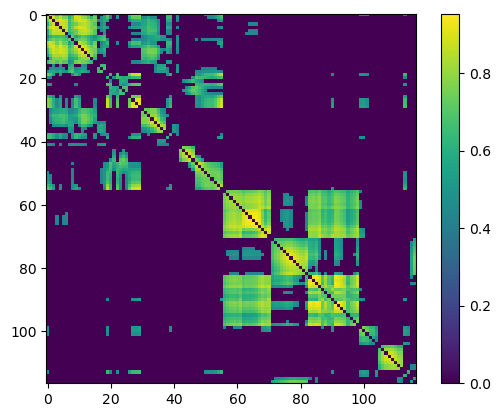

In [8]:
plt.imshow(corr_mat)
plt.colorbar()

In [26]:
all_bands_networks = {}
for band, (low_freq, high_freq) in BRAIN_BANDS.items():
    print(band, flush=True, end='\r')
    #
    result = process_network_for_phase(
        data_pat_phase_ts, fs, band, correlation_protocol, 
        pin_labels, filter_order=1
    )
    G, label_dict, lnkgM, clTh, corr_mat, dists = result
    # ultraDist[patient][phase][band] = extract_ultrametric_matrix(
    #     lnkgM,
    #     G.number_of_nodes()
    # )
    all_bands_networks[band] = {'G': G, 'linkage_matrix': lnkgM, 'clTh': clTh, 'corr_mat': corr_mat, 'dists': dists}

/home/opisthofulax/Documents/research+/brain_network/lrg_eegfc/lrgsglib/src/lrgsglib/utils/basic/signals.py:58: RuntimeWarning: Very narrow filter bandwidth (0.0034 of Nyquist). Consider reducing filter order or increasing bandwidth.
  warnings.warn(


/home/opisthofulax/Documents/research+/brain_network/lrg_eegfc/lrgsglib/src/lrgsglib/utils/basic/signals.py:58: RuntimeWarning: Very narrow filter bandwidth (0.0039 of Nyquist). Consider reducing filter order or increasing bandwidth.
  warnings.warn(


/home/opisthofulax/Documents/research+/brain_network/lrg_eegfc/lrgsglib/src/lrgsglib/utils/basic/signals.py:58: RuntimeWarning: Very narrow filter bandwidth (0.0049 of Nyquist). Consider reducing filter order or increasing bandwidth.
  warnings.warn(
